In [2]:
# Install pip packages in the current Jupyter kernel

import sys
# !{sys.executable} -m pip install numpy
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install matplotlib==3.0.3
# !{sys.executable} -m pip install seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import json

# 커널을 구성하다보면 에러는 아니지만, 빨간색 네모 박스 warning이 뜨는 경우를 제거 
import warnings
warnings.filterwarnings('ignore')

# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 라인
%matplotlib inline
# os 패키지를 통해 현재 디렉토리 위치를 변경하고, read_csv를 더 편리하게 함
import os
os.getcwd() # 현재 디렉토리 파악
os.chdir(r"D:\heeju\특화 프로젝트\DataAnalysis\DataSet") # 불러오고 싶은 파일이 위치한 주소를 ___에 입력

# 다른 노트북 작성할 때도 이 셀만 떼서 사용 가능하다.
import matplotlib.pyplot as plt 
import platform                

# 웬만하면 해주는 것이 좋다.
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin': # 맥os 사용자의 경우에
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows':# 윈도우 사용자의 경우에
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-darkgrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/
    rc('font', family=font_name)

# 한글이 들어간 csv는 encoding 인자를 넣어주는 것이 좋음
df=pd.read_csv("서울시 상권분석서비스(추정매출-상권).csv",encoding='euc-kr') 
df.head()

# 데이터 shape 파악
df.shape

(9707, 55)

In [3]:
# 기준_년분기_코드를 날짜 형식으로 변환
df['기준_년분기_코드'] = pd.to_datetime(df['기준_년분기_코드'], format='%Y%m')

# 새로운 년도 열 생성
df['Year'] = df['기준_년분기_코드'].dt.year

# 특정 상권 코드 설정
target_market_code = 3110001

# 특정 상권에 해당하는 데이터 필터링
target_market_data = df[df['상권_코드'] == target_market_code]

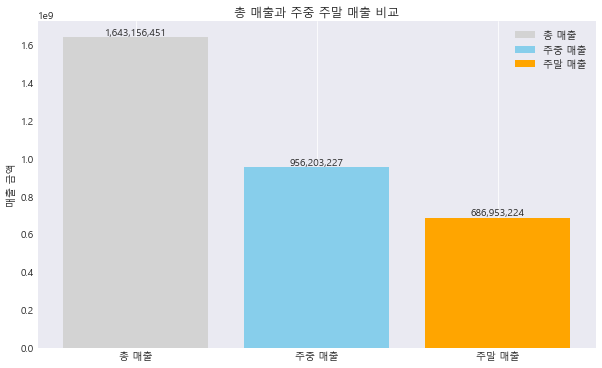

In [6]:
# 총 매출, 주중 매출, 주말 매출 데이터 선택
total_sales = target_market_data[target_market_data['Year'] == 2023]['당월_매출_금액'].sum()
weekday_sales = target_market_data[target_market_data['Year'] == 2023]['주중_매출_금액'].sum()
weekend_sales = target_market_data[target_market_data['Year'] == 2023]['주말_매출_금액'].sum()

# 바 차트 그리기
plt.figure(figsize=(10, 6))
plt.bar(['총 매출'], [total_sales], color='lightgray', label='총 매출')
plt.bar(['주중 매출'], [weekday_sales], color='skyblue', label='주중 매출')
plt.bar(['주말 매출'], [weekend_sales], color='orange', label='주말 매출')

# 매출 금액 표시
for i, sales in enumerate([total_sales, weekday_sales, weekend_sales]):
    plt.text(i, sales, f'{sales:,}', ha='center', va='bottom')

plt.title('총 매출과 주중 주말 매출 비교')
plt.ylabel('매출 금액')
plt.legend()
plt.grid(axis='y')

plt.show()

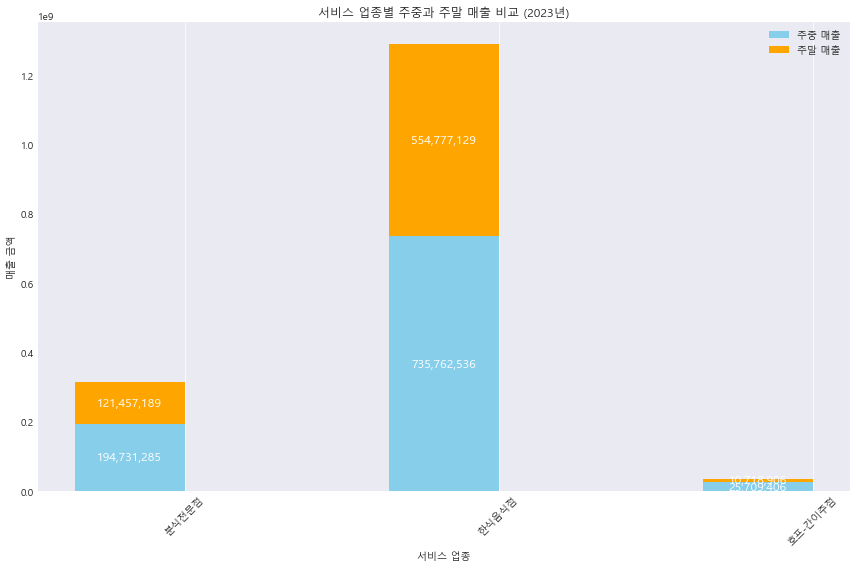

In [42]:
# 평균?
# 각 서비스 업종별 매출 데이터 선택
service_sales = target_market_data[target_market_data['Year'] == 2023][['서비스_업종_코드_명', '당월_매출_금액', '주중_매출_금액', '주말_매출_금액']]

# 서비스 업종 코드별로 그룹화하여 매출 합계 계산
service_sales_sum = service_sales.groupby('서비스_업종_코드_명').sum()

# 서비스 업종별 주중과 주말 매출을 스택으로 표현하기 위한 데이터 배열 생성
service_sales_data = np.array(service_sales_sum[['주중_매출_금액', '주말_매출_금액']].values.tolist())

# 스택 막대 그래프 그리기
plt.figure(figsize=(12, 8))
bar_width = 0.35
x = np.arange(len(service_sales_sum.index))
plt.bar(x, service_sales_data[:, 0], color='skyblue', label='주중 매출', width=bar_width)
plt.bar(x, service_sales_data[:, 1], color='orange', label='주말 매출', width=bar_width, bottom=service_sales_data[:, 0])

# 그래프에 주중과 주말 매출 금액 표시
for i, (weekday, weekend) in enumerate(service_sales_data):
    plt.text(i, weekday / 2, f'{int(weekday):,}', ha='center', va='center', color='white', fontsize=12)
    plt.text(i , weekday + weekend / 2, f'{int(weekend):,}', ha='center', va='center', color='white', fontsize=12)

plt.title('서비스 업종별 주중과 주말 매출 비교 (2023년)')
plt.xlabel('서비스 업종')
plt.ylabel('매출 금액')
plt.xticks(x + bar_width / 2, service_sales_sum.index, rotation=45)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

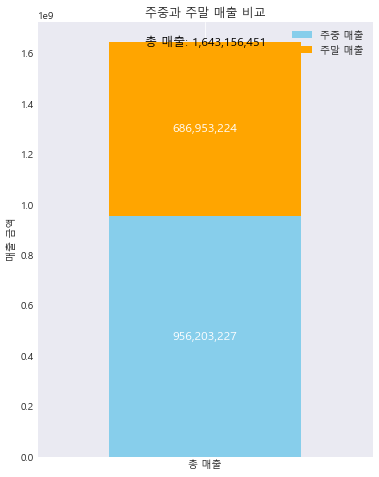

In [16]:
# 스택 막대 그래프를 그리기 위해 데이터를 배열로 변환
sales_data = np.array([[weekday_sales], [weekend_sales]])

# 바 차트 그리기
plt.figure(figsize=(6, 8))
plt.bar(['총 매출'], sales_data[0], color='skyblue', label='주중 매출')
plt.bar(['총 매출'], sales_data[1], color='orange', bottom=sales_data[0], label='주말 매출')

# 주중과 주말 매출 금액 표시
plt.text(0, weekday_sales / 2, f'{weekday_sales:,}', ha='center', va='center', color='white', fontsize=12)
plt.text(0, weekday_sales + weekend_sales / 2, f'{weekend_sales:,}', ha='center', va='center', color='white', fontsize=12)

# 주중과 주말 매출 금액 표시
plt.text(0, total_sales + 1000, f'총 매출: {total_sales:,}', ha='center', va='center', color='black', fontsize=12)


plt.title('주중과 주말 매출 비교')
plt.ylabel('매출 금액')
plt.legend()
plt.grid(axis='y')

# x 축 범위 설정
plt.xlim(left=-0.7, right=0.7)

plt.show()

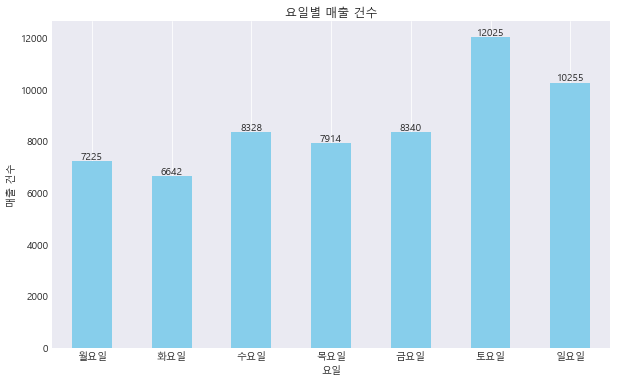

In [20]:
weekday_columns = ['월요일_매출_건수', '화요일_매출_건수', '수요일_매출_건수',
                                         '목요일_매출_건수', '금요일_매출_건수', '토요일_매출_건수', '일요일_매출_건수'] 

# 요일별 매출 건수 데이터 선택
weekday_sales_count = target_market_data[target_market_data['Year'] == 2023][weekday_columns].sum()

# 시간대 라벨 수정
weekday_labels = [f'{weekday.split("_")[0]}' for weekday in weekday_columns]

# 바 차트 그리기
plt.figure(figsize=(10, 6))
weekday_sales_count.plot(kind='bar', color='skyblue')
plt.title('요일별 매출 건수')
plt.xlabel('요일')
plt.ylabel('매출 건수')
plt.xticks(range(len(weekday_labels)), weekday_labels, rotation=0)
plt.grid(axis='y')

# 매출 건수 값 표시
for i, value in enumerate(weekday_sales_count):
    plt.text(i, value, f'{value}', ha='center', va='bottom')

plt.show()

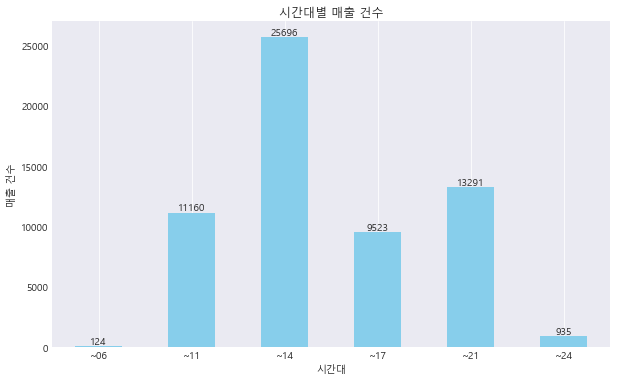

In [26]:
time_sales_columns = ['시간대_건수~06_매출_건수', '시간대_건수~11_매출_건수', '시간대_건수~14_매출_건수',
                                      '시간대_건수~17_매출_건수', '시간대_건수~21_매출_건수', '시간대_건수~24_매출_건수']

# 시간대별 매출 건수 데이터 선택
time_sales_count = target_market_data[target_market_data['Year'] == 2023][time_sales_columns].sum()

# 시간대 라벨 수정
time_sales_labels = [f'{time_sales[6:9]}' for time_sales in time_sales_columns]

# 바 차트 그리기
plt.figure(figsize=(10, 6))
time_sales_count.plot(kind='bar', color='skyblue')
plt.title('시간대별 매출 건수')
plt.xlabel('시간대')
plt.ylabel('매출 건수')
plt.xticks(range(len(time_sales_labels)), time_sales_labels, rotation=0)
plt.grid(axis='y')

# 매출 건수 값 표시
for i, value in enumerate(time_sales_count):
    plt.text(i, value, f'{value}', ha='center', va='bottom')

plt.show()

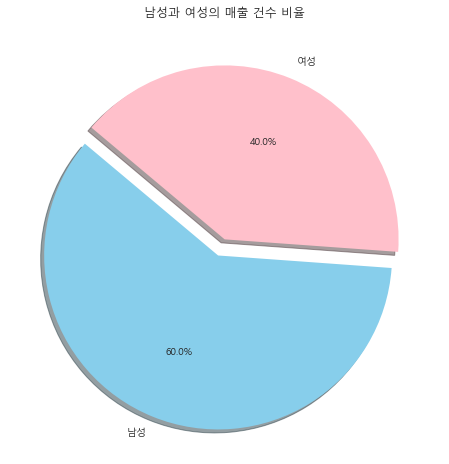

In [30]:
# 남성과 여성의 매출 건수 데이터 선택
gender_sales_count = target_market_data[target_market_data['Year'] == 2023][['남성_매출_건수', '여성_매출_건수']].sum()

explode = (0.1, 0)  # 강조를 위해 첫 번째 조각을 조금 벗어나도록 설정

# 파이 차트 그리기
plt.figure(figsize=(8, 8))
plt.pie(gender_sales_count, labels=['남성', '여성'], explode=explode, autopct='%1.1f%%', colors=['skyblue', 'pink'], shadow=True, startangle=140)
plt.title('남성과 여성의 매출 건수 비율')
plt.show()

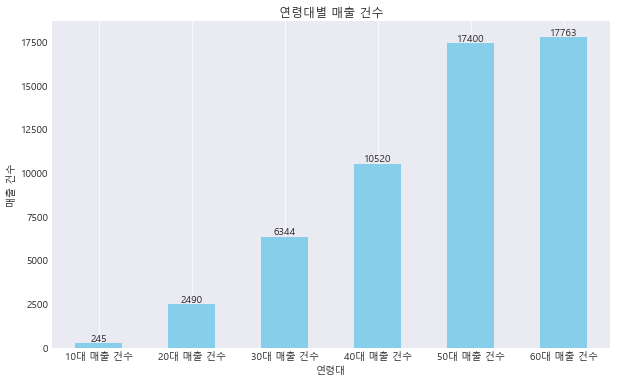

In [34]:
# 연령대별 매출 건수 데이터 선택
age_sales_count_columns = ['연령대_10_매출_건수', '연령대_20_매출_건수', '연령대_30_매출_건수',
                          '연령대_40_매출_건수', '연령대_50_매출_건수', '연령대_60_이상_매출_건수']
age_sales_count = target_market_data[target_market_data['Year'] == 2023][age_sales_count_columns].sum()

# 시간대 라벨 수정
age_sales_count_labels = [f'{age_sales_count.split("_")[1]}대 매출 건수' for age_sales_count in age_sales_count_columns]

# 바 차트 그리기
plt.figure(figsize=(10,6))
age_sales_count.plot(kind='bar', color='skyblue')
plt.title('연령대별 매출 건수')
plt.xlabel('연령대')
plt.ylabel('매출 건수')
plt.xticks(range(len(age_sales_count_labels)), age_sales_count_labels, rotation=0)
plt.grid(axis='y')

# 매출 건수 값 표시
for i, value in enumerate(age_sales_count):
    plt.text(i, value, f'{value}', ha='center', va='bottom')

plt.show()

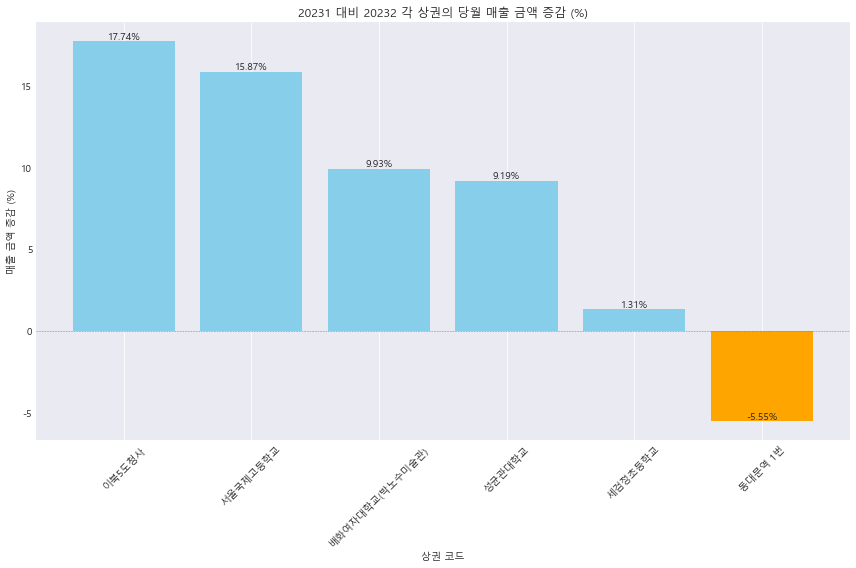

In [17]:
# 필요한 상권 코드 리스트
target_market_codes = ["이북5도청사", "세검정초등학교", "배화여자대학교(박노수미술관)", "서울국제고등학교", "성균관대학교", "동대문역 1번"]

# 필요한 기준 년분기 코드
prev_quarter_code = 20231
curr_quarter_code = 20232

# 필요한 상권 코드에 해당하는 데이터 필터링
target_data = df[df['상권_코드_명'].isin(target_market_codes)]

# 이전 분기와 현재 분기 데이터 분리
prev_quarter_data = target_data[target_data['기준_년분기_코드'] == prev_quarter_code]
curr_quarter_data = target_data[target_data['기준_년분기_코드'] == curr_quarter_code]

# 상권 코드를 기준으로 그룹화하여 당월 매출 총합 계산
prev_quarter_sales = prev_quarter_data.groupby('상권_코드_명')['당월_매출_금액'].sum()
curr_quarter_sales = curr_quarter_data.groupby('상권_코드_명')['당월_매출_금액'].sum()

# 증감 계산
change_data = curr_quarter_sales - prev_quarter_sales

# 증감액을 백분율로 변환
change_percent = (change_data / prev_quarter_sales) * 100

# 데이터프레임 생성
change_df = pd.DataFrame({'상권_코드_명': change_data.index, '매출_증감_백분율': change_percent.values})

# 매출 증감 백분율을 기준으로 내림차순 정렬
sorted_data = change_df.sort_values(by='매출_증감_백분율', ascending=False)

# 그래프 그리기
plt.figure(figsize=(12, 8))
bars = plt.bar(sorted_data['상권_코드_명'], sorted_data['매출_증감_백분율'], color=['skyblue' if x >= 0 else 'orange' for x in sorted_data['매출_증감_백분율']])

plt.title(f"{prev_quarter_code} 대비 {curr_quarter_code} 각 상권의 당월 매출 금액 증감 (%)")
plt.xlabel("상권 코드")
plt.ylabel("매출 금액 증감 (%)")
plt.xticks(rotation=45)
plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.5)  # 0을 기준으로 선 추가
plt.grid(axis='y')
plt.tight_layout()

# 막대 그래프에 값 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')

plt.show()

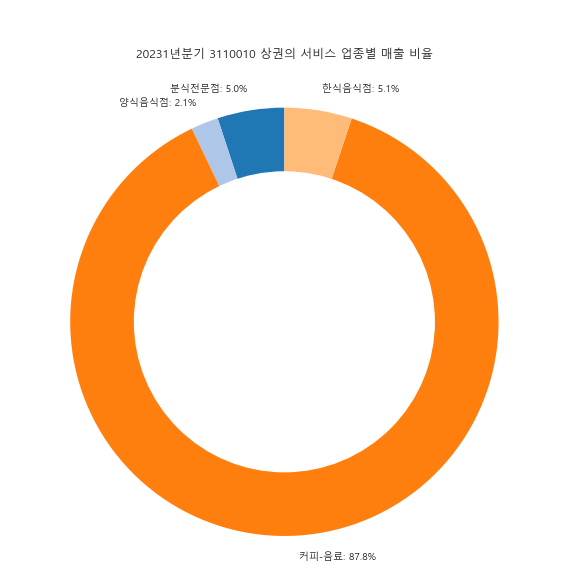

In [29]:
# 특정 상권 코드
target_market_code = 3110010

# 특정 년분기 코드
year_quarter_code = "20231"

# 특정 상권에서 특정 년분기에 해당하는 데이터 필터링
selected_data = df[(df['상권_코드'] == target_market_code) & (df['기준_년분기_코드'] == int(year_quarter_code))]

# 각 서비스 업종별 총 매출 계산
total_sales = selected_data['당월_매출_금액'].sum()

# 각 서비스 업종별 매출 비율 계산
sales_ratios = selected_data.groupby('서비스_업종_코드_명')['당월_매출_금액'].sum() / total_sales * 100

# 서비스 업종명과 퍼센트 값을 함께 표시하기 위한 리스트 생성
labels_with_percentages = [f"{label}: {ratio:.1f}%" for label, ratio in zip(sales_ratios.index, sales_ratios)]

# 도넛 차트 그리기
plt.figure(figsize=(8, 8))
plt.pie(sales_ratios, labels=labels_with_percentages, startangle=90, colors=plt.cm.tab20.colors)
center_circle = plt.Circle((0, 0), 0.7, color='white', fc='white', linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.title(f"\n\n\n{year_quarter_code}년분기 {target_market_code} 상권의 서비스 업종별 매출 비율\n", pad=20)
plt.axis('equal')  # 원형 그래프 유지
plt.tight_layout()
plt.show()